<a href="https://colab.research.google.com/github/sahar7888/CheatSheet/blob/main/Tensorflow_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tain a model using Tensorflow :

In [96]:
#Import the librarries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import BinaryAccuracy, FalseNegatives
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.metrics import confusion_matrix

ImportError: cannot import name 'confusion_matrix' from 'tensorflow.keras.metrics' (/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/metrics/__init__.py)

In [86]:
#Generate a sample dataset
X = np.random.rand(1000, 10)  # 1000 samples, 10 features
y = np.random.randint(0, 2, size=(1000,))  # 2 classes

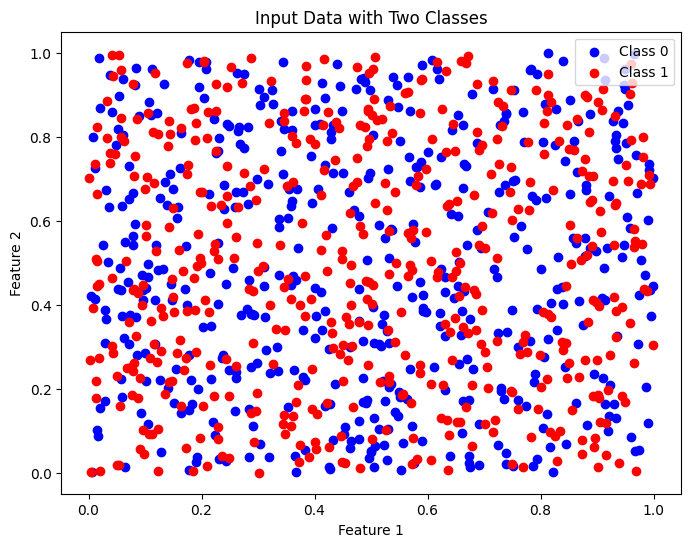

In [87]:
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')
plt.title('Input Data with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [88]:

# Normalize the input data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [89]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=3)  # Reduce to 5 principal components
X_pca = pca.fit_transform(X_scaled)

In [90]:
#split data
X_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [91]:
#Create the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(10,)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])


In [92]:
# Convert the labels to one-hot encoded format
y_train_onehot = tf.one_hot(y_train, depth=2)

# Train the model
model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss=BinaryCrossentropy(),
    metrics=[
        BinaryAccuracy(),
        FalseNegatives(),
    ],
)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train_onehot, epochs=400, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/400
20/20 [==============================] - 1s 14ms/step - loss: 0.7245 - binary_accuracy: 0.4969 - false_negatives_5: 322.0000 - val_loss: 0.7047 - val_binary_accuracy: 0.4313 - val_false_negatives_5: 91.0000
Epoch 2/400
20/20 [==============================] - 0s 6ms/step - loss: 0.7159 - binary_accuracy: 0.5063 - false_negatives_5: 316.0000 - val_loss: 0.7049 - val_binary_accuracy: 0.4500 - val_false_negatives_5: 88.0000
Epoch 3/400
20/20 [==============================] - 0s 5ms/step - loss: 0.7059 - binary_accuracy: 0.5141 - false_negatives_5: 311.0000 - val_loss: 0.6997 - val_binary_accuracy: 0.4938 - val_false_negatives_5: 81.0000
Epoch 4/400
20/20 [==============================] - 0s 5ms/step - loss: 0.7087 - binary_accuracy: 0.4906 - false_negatives_5: 326.0000 - val_loss: 0.6987 - val_binary_accuracy: 0.5125 - val_false_negatives_5: 78.0000
Epoch 5/400
20/20 [==============================] - 0s 5ms/step - loss: 0.6947 - binary_accuracy: 0.5422 - false_negatives_5: 

In [93]:
# Evaluate the model
y_test_onehot = tf.one_hot(y_test, depth=2)
test_loss= model.evaluate(x_test, y_test_onehot)
print('Test accuracy:', test_acc)

7/7 [==============================] - 0s 4ms/step - loss: 0.6975 - binary_accuracy: 0.4500 - false_negatives_5: 110.0000
Test accuracy: 0.22499999403953552


In [94]:
#Prediction
y_pred_proba = model.predict(x_test)
y_pred = np.round(y_pred_proba).flatten()

7/7 [==============================] - 0s 2ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

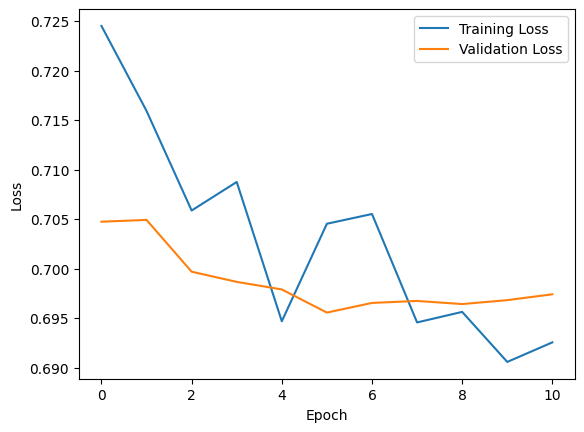

In [101]:
#Plot training vs validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show

In [83]:
# # Define a function to compute the confusion matrix
# # def confusion_matrix(y_true, y_pred):
#     # Calculate the confusion matrix
#     cm = tf.math.confusion_matrix(y_true, y_pred)
#     return cm